In [487]:
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.ndimage as ndi
import warnings
warnings.filterwarnings("ignore")

# Original MRT image

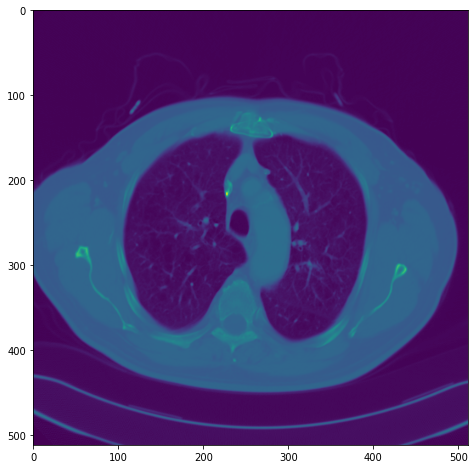

In [481]:
im = imageio.imread("1012_2343_bundle_archive/dicom_dir/ID_0044_AGE_0072_CONTRAST_1_CT.dcm")
plt.figure(figsize = (8,8))
plt.imshow(im)
plt.show()

# Histogram of pixels and Camulative function of distribution

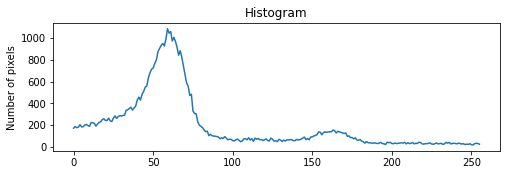

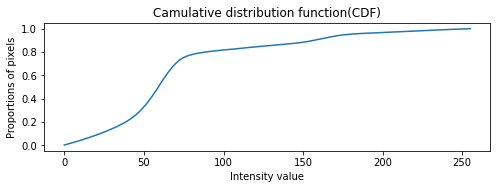

In [532]:
plt.figure(figsize = (8,8))
plt.subplot(3, 1, 1)
hist=ndi.histogram(im, min=0 , max=255 , bins=256 )
plt.plot(hist)
plt.ylabel('Number of pixels')
plt.title('Histogram')
plt.show()

plt.figure(figsize = (8,8))
plt.subplot(3, 1, 2)
cdf = hist.cumsum()/hist.sum()
plt.plot(cdf)
plt.xlabel('Intensity value')
plt.ylabel('Proportions of pixels')
plt.title('Camulative distribution function(CDF)')
plt.show()

 # MRT image with gray colormap 

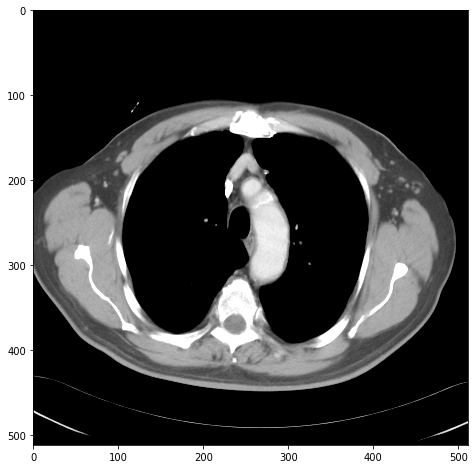

In [482]:
plt.figure(figsize = (8,8))
plt.imshow(im, vmin = -200, vmax= 200, cmap='gray')
plt.show()

# MRT images with Binary Erosion

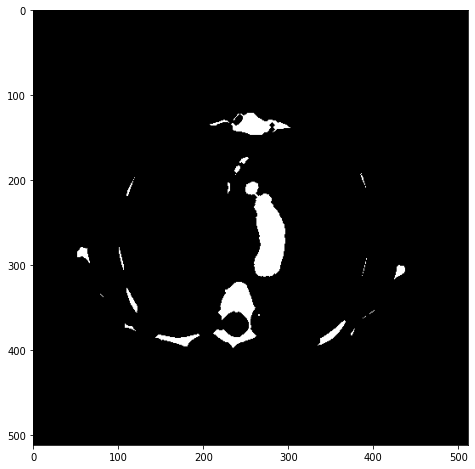

In [530]:
bone=np.where(im>100,1,0)
d=ndi.binary_erosion(bone,iterations=3)
plt.figure(figsize = (8,8))
plt.imshow(d, cmap='gray')
plt.show()

#  MRT image horizontal convolved

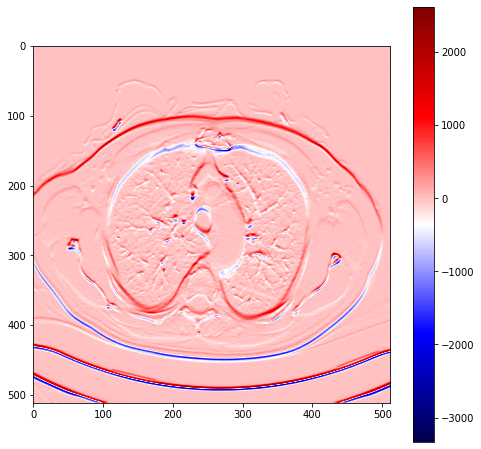

In [483]:
weights=[[+1,+1,+1],
         [0, 0, 0],
         [-1,-1,-1]]
edges=ndi.convolve(im, weights)
plt.figure(figsize = (8,8))
plt.imshow(edges, cmap='seismic')
plt.colorbar()
plt.show()

# MRT image with Sobel Filter

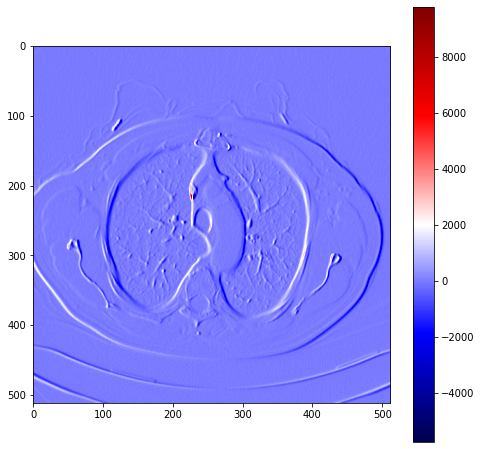

In [484]:
sobel=ndi.sobel(im, axis=1)
plt.figure(figsize=(8,8))
plt.imshow(sobel, cmap='seismic')
plt.colorbar()
plt.show()

# All edges of MRT image

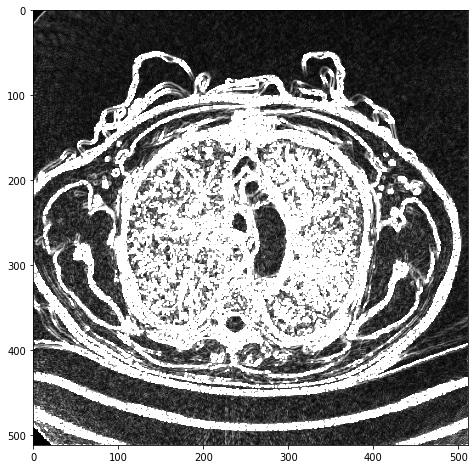

In [489]:
edges1=ndi.sobel(im, axis=0)
edges2=ndi.sobel(im, axis=1)
edges=np.sqrt(np.square(edges1)+np.square(edges2))
plt.figure(figsize=(8,8))
plt.imshow(edges, cmap='gray')
plt.show()

# Gaussian Filter with Mask to find individual objects on the MRT image

Count of labels: 18


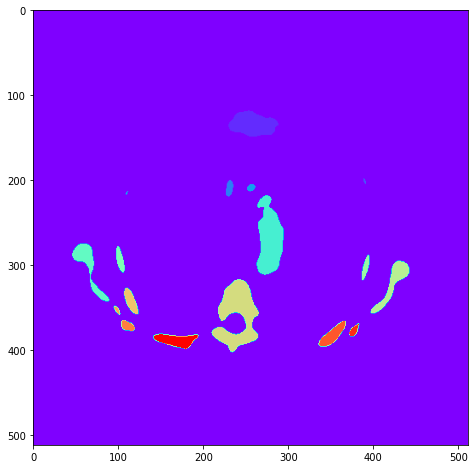

In [515]:
filt=ndi.gaussian_filter(im, sigma=3)
mask= filt>150
labels, nlabels= ndi.label(mask)
print("Count of labels:",nlabels)
plt.figure(figsize=(8,8))
plt.imshow(labels, cmap='rainbow')
plt.show()

# Object with label 12

0.009273529052734375

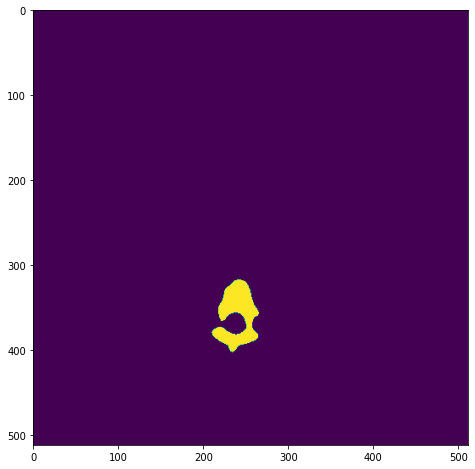

In [516]:
lab1=np.where(labels==12,mask,0)
plt.figure(figsize=(8,8))
plt.imshow(lab1)
ndi.mean(lab1)

# Box with object (label 12)

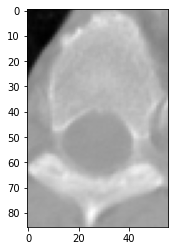

In [517]:
boxes=ndi.find_objects(labels)
plt.imshow(im[boxes[11]], cmap='gray')
plt.show()

# Histogram for object(label 12)

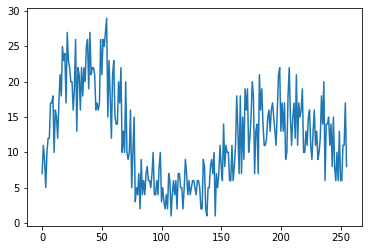

In [518]:
object_hist=ndi.histogram(im[boxes[11]],min=0 , max=255 , bins=256 )
plt.plot(object_hist)
plt.show()

# Information about voxels: volume, count on the picture, volume of label 12

In [534]:
d0,d1=im.meta['sampling']
dvoxel=d0*d1
nvoxels=ndi.sum(1, labels, index=12)
volume=dvoxel*nvoxels
print('Voxel volume(mm^2):', dvoxel)
print('Count of voxels on the picture(label 12):', nvoxels)
print('Volume of label 12(mm^2):', volume)

Voxel volume(mm^2): 0.4861793169433601
Count of voxels on the picture(label 12): 2431
Volume of label 12(mm^2): 1181.9019194893083


# Center of mass for object with label 12

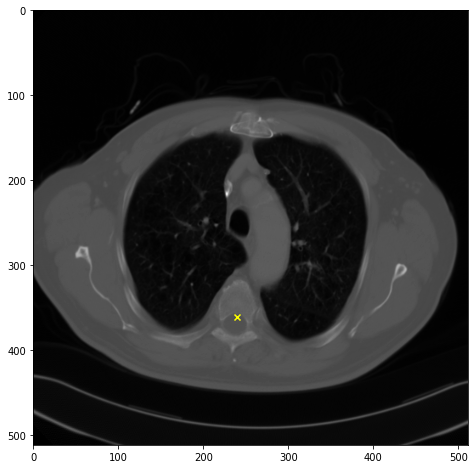

In [526]:
com=ndi.center_of_mass(im, labels, index=12)
plt.figure(figsize=(8,8))
plt.imshow(im, cmap='gray')
plt.scatter(com[1],com[0],color='yellow',marker='x')
plt.show()

# MRT image1

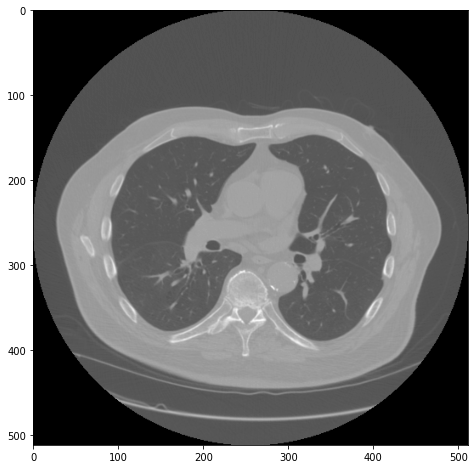

In [528]:
im1 = imageio.imread("1012_2343_bundle_archive/dicom_dir/ID_0075_AGE_0080_CONTRAST_0_CT.dcm")
plt.figure(figsize=(8,8))
plt.imshow(im1, cmap='gray')
plt.show()

# Error for two  MRT images 

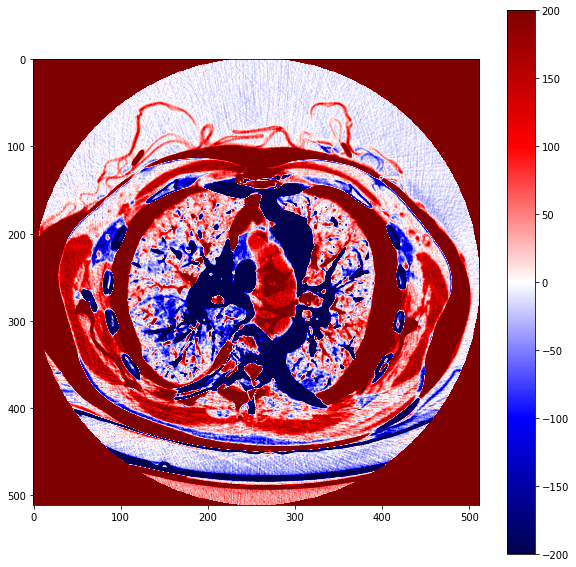

In [529]:
error=im-im1
plt.figure(figsize=(10,10))
plt.imshow(error, cmap='seismic', vmin=-200, vmax=200)
plt.colorbar()
plt.show()

# Absolute error for two MRT images

414.35435485839844


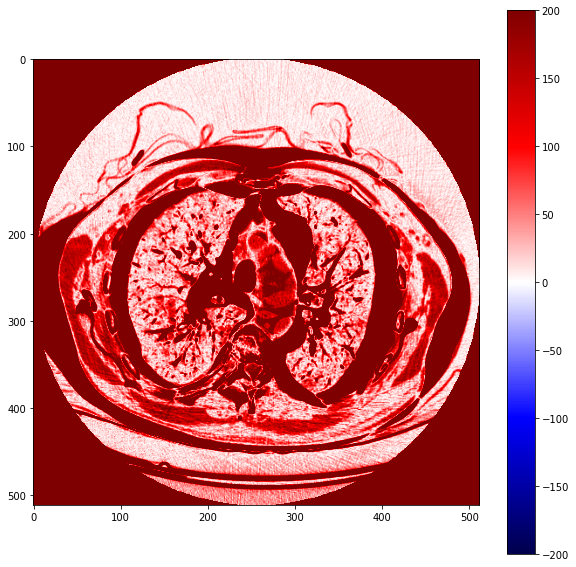

In [478]:
abs_error=np.abs(error)
plt.figure(figsize=(10,10))
plt.imshow(abs_error, cmap='seismic', vmin=-200, vmax=200)
plt.colorbar()
mae=np.mean(abs_error)
print(mae)

# Masks (&, |) for two MRT images. Similarity of two images

% of similarity is: 28.729187640362426


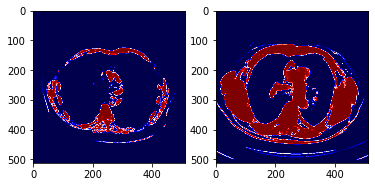

In [469]:
mask=im>0
mask1=im1>0
masks=mask&mask1
union=mask|mask1
iou=masks.sum()/union.sum()

fig, axes=plt.subplots(1,2)
axes[0].imshow(masks, cmap='seismic')
axes[1].imshow(union, cmap='seismic')
print("% of similarity is:",iou*100)